<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Maths%20for%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import decomposition

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# x and y are lists representing the coefficients for the two vectors
cosine = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

# **Perceptron Algorithm**

## Creating the dataset

In [ ]:
x,y=datasets.make_blobs(n_samples=200,
                    centers=[[2,2],[10,10]],
                    n_features=2,
                    center_box=(0,10),
                    cluster_std=3)

In [ ]:
x

array([[ 8.01112282e+00,  4.20875582e+00],
       [ 1.46599569e+01,  1.10077755e+01],
       [ 4.37253926e+00, -2.25374557e+00],
       [-1.53280677e-01,  7.64566257e+00],
       [ 7.24762662e+00,  1.44535589e+01],
       [ 5.12438666e-01, -5.88931572e-01],
       [-1.17344294e-01, -3.28537191e+00],
       [ 1.89903247e+00, -1.43257404e+00],
       [-9.72040952e-01,  3.08203792e+00],
       [-2.01707791e+00,  5.09927054e+00],
       [ 1.03907236e+01,  7.17965249e+00],
       [ 8.96041498e+00,  1.43264648e+01],
       [ 1.26885417e+01,  5.16964180e+00],
       [ 1.14278596e+00,  4.40341919e+00],
       [ 7.49505563e+00,  1.08328909e+01],
       [-1.45858684e+00,  8.90987347e-01],
       [ 7.42667489e+00,  5.67578072e-01],
       [-1.80132120e+00,  2.05173535e-01],
       [ 8.96092863e+00,  7.02727425e+00],
       [ 6.09209136e+00,  5.90410876e+00],
       [ 3.65235357e+00, -4.39221049e-01],
       [ 1.08807419e+01,  9.47345069e+00],
       [ 5.66847379e-01,  2.33845805e+00],
       [ 7.

In [ ]:
x.shape

(200, 2)

In [ ]:
y

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0])

In [ ]:
y.shape

(200,)

In [ ]:
y[y==0]=-1

In [ ]:
np.unique(y,return_counts=True)

(array([-1,  1]), array([100, 100]))

## Visualise the Dataset

In [ ]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val=(-w[0]*x_val - w0)/w[1]
    plt.plot(x_val,y_val)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()

In [ ]:
w = np.random.normal(size=(2,))
w0 = np.random.normal()

In [ ]:
w,w0

(array([-0.9095906 , -1.39560262]), 0.07588480755202115)

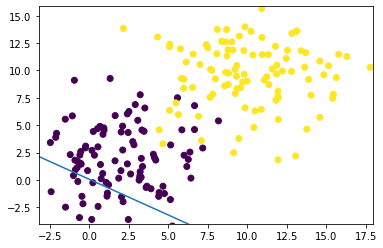

In [ ]:
show(w,w0,x,y)

In [ ]:
(w,w0)

(array([-0.9095906 , -1.39560262]), 0.07588480755202115)

In [ ]:
np.linalg.norm(w,ord = 1)

2.3051932169421847

In [ ]:
#preferred
np.linalg.norm(w)

1.665851652029424

In [ ]:
# not preferred
np.sqrt((w[0]**2)+(w[1]**2))

1.665851652029424

## Implementing Perceptron Algorithm

In [ ]:
def dist_point_hyperplane(w,w0,x):
    d= (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d

In [ ]:
def perceptron_training(x,y,w,w0,num_iter=100):
    for i in range(num_iter):
        print(f"Iteration No. : {i+1}")
        miss_classified_points = 0
        for (xi,yi) in zip(x,y):
            d= dist_point_hyperplane(w,w0,xi)
            hs=np.sign(d)
            if hs != np.sign(yi):
                miss_classified_points += 1
                w = w + ( xi * yi)
                w0 = w0 +np.sign(yi)
        print(f"Current Accuracy : {100 - (100*miss_classified_points/len(y))}")
        print(f"Weights : {w[0],w[1],w0}")
        show(w,w0,x,y)
        print("-"*50)
        if miss_classified_points == 0:
            return w, w0
    return w,w0


Iteration No. : 1
Current Accuracy : 73.5
Weights : (4.704695368788436, 1.7684224399521096, -24.924115192447978)


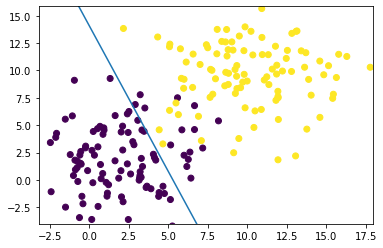

--------------------------------------------------
Iteration No. : 2
Current Accuracy : 81.5
Weights : (12.49832023908462, 8.711373729484247, -37.92411519244798)


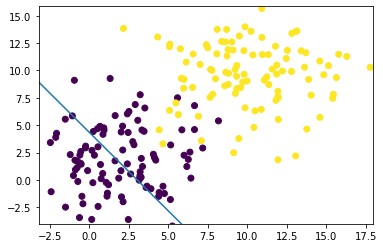

--------------------------------------------------
Iteration No. : 3
Current Accuracy : 83.5
Weights : (3.059427633572051, 6.330571733906952, -50.92411519244798)


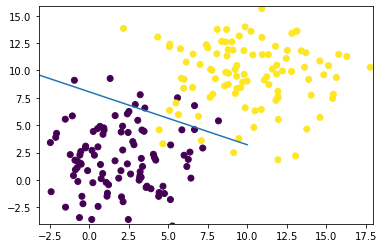

--------------------------------------------------
Iteration No. : 4
Current Accuracy : 85.5
Weights : (4.992570009946821, 5.91083768025744, -59.92411519244798)


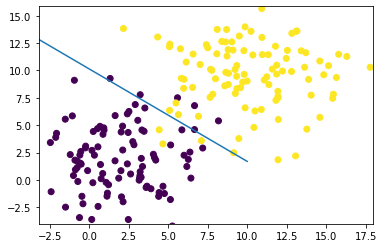

--------------------------------------------------
Iteration No. : 5
Current Accuracy : 84.5
Weights : (10.083564111162543, 6.906509046941751, -68.92411519244797)


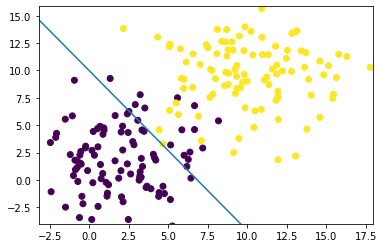

--------------------------------------------------
Iteration No. : 6
Current Accuracy : 91.0
Weights : (6.81616685022077, 7.09222946587615, -72.92411519244797)


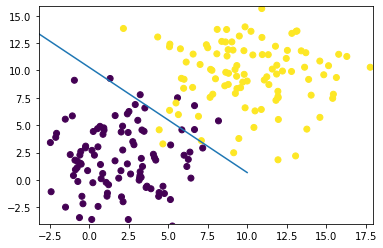

--------------------------------------------------
Iteration No. : 7
Current Accuracy : 87.0
Weights : (10.22436657521448, 7.883786227291286, -80.92411519244797)


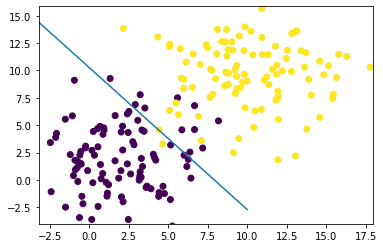

--------------------------------------------------
Iteration No. : 8
Current Accuracy : 89.5
Weights : (12.378009376787722, 10.14038447884819, -85.92411519244797)


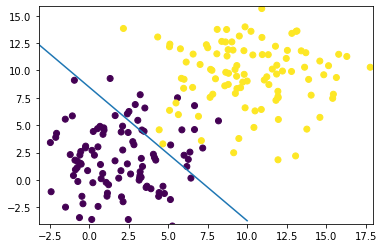

--------------------------------------------------
Iteration No. : 9
Current Accuracy : 90.0
Weights : (13.527553572926758, 8.403697106291396, -89.92411519244797)


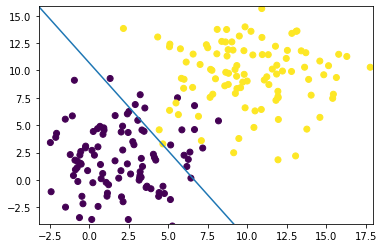

--------------------------------------------------
Iteration No. : 10
Current Accuracy : 90.0
Weights : (7.869193502219971, 8.509840297435709, -93.92411519244797)


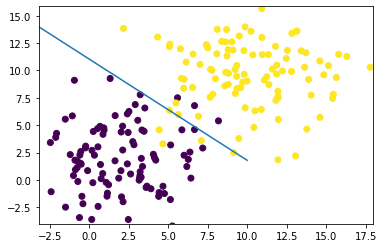

--------------------------------------------------
Iteration No. : 11
Current Accuracy : 92.0
Weights : (7.709931474621878, 7.236612520175829, -95.92411519244797)


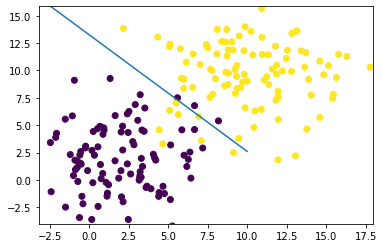

--------------------------------------------------
Iteration No. : 12
Current Accuracy : 89.5
Weights : (13.290187960291957, 10.074771472150697, -98.92411519244797)


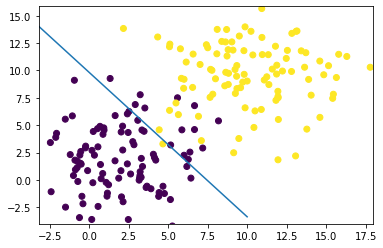

--------------------------------------------------
Iteration No. : 13
Current Accuracy : 91.0
Weights : (7.376698644524253, 8.302956160924975, -102.92411519244797)


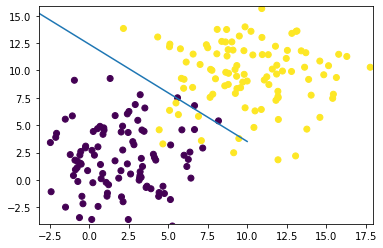

--------------------------------------------------
Iteration No. : 14
Current Accuracy : 89.5
Weights : (15.099932458464446, 9.764097277133747, -105.92411519244797)


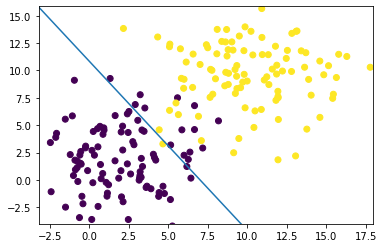

--------------------------------------------------
Iteration No. : 15
Current Accuracy : 91.0
Weights : (8.62171304989684, 11.04202429386213, -109.92411519244797)


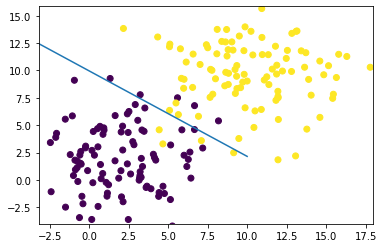

--------------------------------------------------
Iteration No. : 16
Current Accuracy : 89.5
Weights : (14.076144464698212, 11.33716701395526, -112.92411519244797)


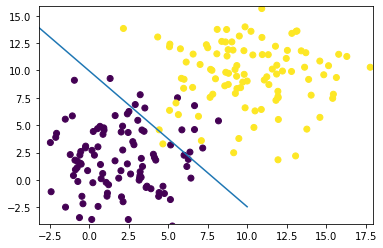

--------------------------------------------------
Iteration No. : 17
Current Accuracy : 90.5
Weights : (8.435899774766941, 11.740354966009813, -115.92411519244797)


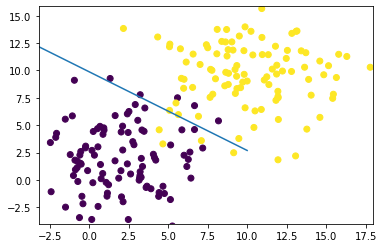

--------------------------------------------------
Iteration No. : 18
Current Accuracy : 91.0
Weights : (8.454735750126908, 7.898682197894992, -117.92411519244797)


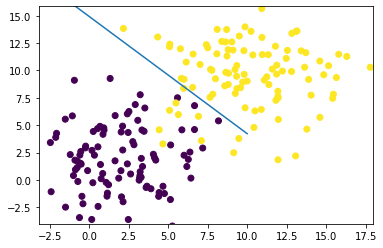

--------------------------------------------------
Iteration No. : 19
Current Accuracy : 93.0
Weights : (7.087551177055167, 10.652940479585006, -119.92411519244797)


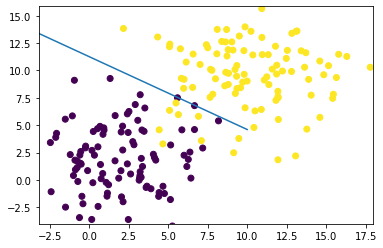

--------------------------------------------------
Iteration No. : 20
Current Accuracy : 92.5
Weights : (9.05793253151742, 8.809709934580159, -120.92411519244797)


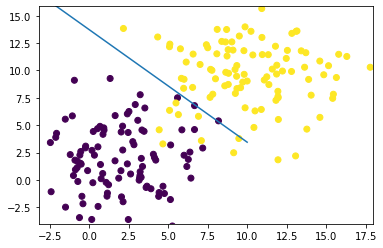

--------------------------------------------------
Iteration No. : 21
Current Accuracy : 92.0
Weights : (5.472006011662258, 11.16006297272865, -122.92411519244797)


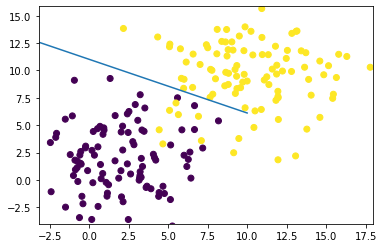

--------------------------------------------------
Iteration No. : 22
Current Accuracy : 92.5
Weights : (10.04218512304914, 13.116260713951332, -123.92411519244797)


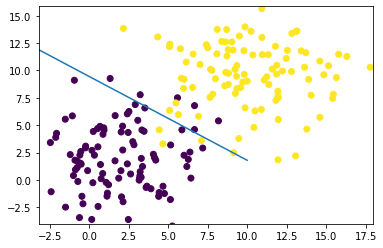

--------------------------------------------------
Iteration No. : 23
Current Accuracy : 91.0
Weights : (12.821709808552608, 7.128994119338122, -125.92411519244797)


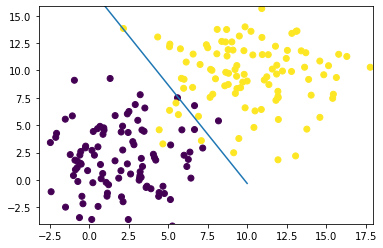

--------------------------------------------------
Iteration No. : 24
Current Accuracy : 92.0
Weights : (8.636456052176342, 12.650648911747831, -127.92411519244797)


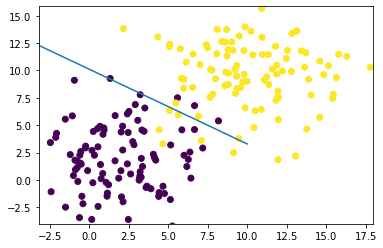

--------------------------------------------------
Iteration No. : 25
Current Accuracy : 92.5
Weights : (10.160836318968162, 12.527946836293312, -128.92411519244797)


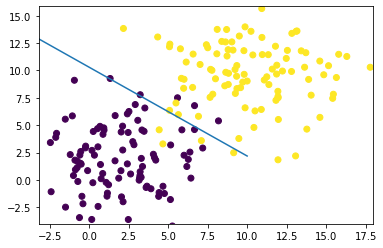

--------------------------------------------------
Iteration No. : 26
Current Accuracy : 91.0
Weights : (10.179672294328128, 8.686274068178491, -130.92411519244797)


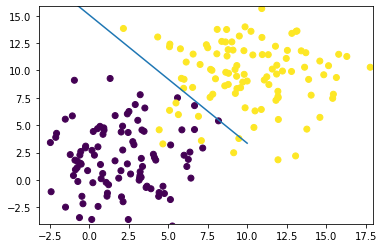

--------------------------------------------------
Iteration No. : 27
Current Accuracy : 92.5
Weights : (11.709747996066472, 8.526386871665897, -131.92411519244797)


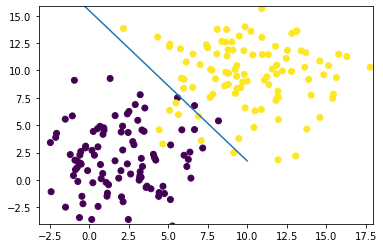

--------------------------------------------------
Iteration No. : 28
Current Accuracy : 92.5
Weights : (10.483123309377874, 13.099829082651569, -132.92411519244797)


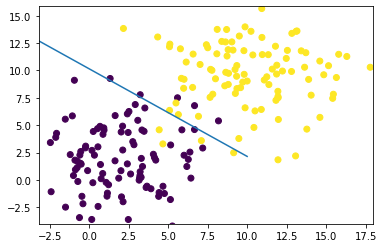

--------------------------------------------------
Iteration No. : 29
Current Accuracy : 91.0
Weights : (10.50195928473784, 9.258156314536748, -134.92411519244797)


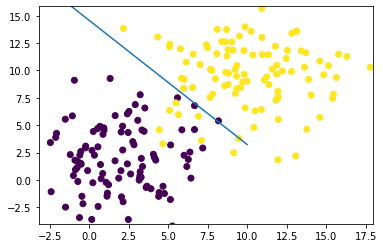

--------------------------------------------------
Iteration No. : 30
Current Accuracy : 92.5
Weights : (12.03203498647618, 9.098269118024154, -135.92411519244797)


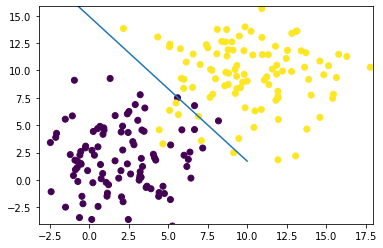

--------------------------------------------------
Iteration No. : 31
Current Accuracy : 90.0
Weights : (9.808832928631738, 10.876807735420986, -137.92411519244797)


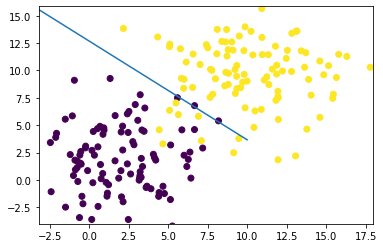

--------------------------------------------------
Iteration No. : 32
Current Accuracy : 92.0
Weights : (9.403084791831851, 10.18553082283805, -139.92411519244797)


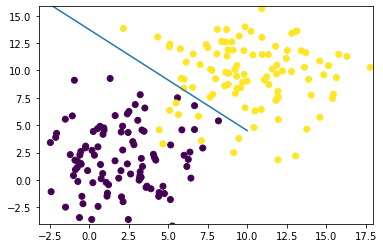

--------------------------------------------------
Iteration No. : 33
Current Accuracy : 93.0
Weights : (8.035900218760112, 12.939789104528062, -141.92411519244797)


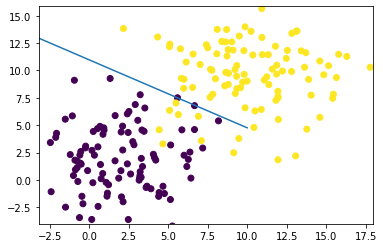

--------------------------------------------------
Iteration No. : 34
Current Accuracy : 92.5
Weights : (10.006281573222363, 11.096558559523213, -142.92411519244797)


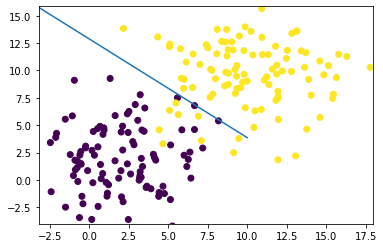

--------------------------------------------------
Iteration No. : 35
Current Accuracy : 93.0
Weights : (8.63909700015062, 13.850816841213229, -144.92411519244797)


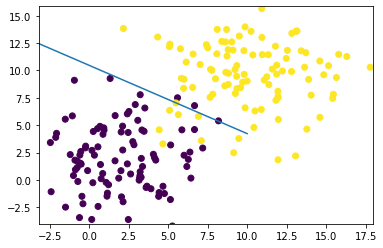

--------------------------------------------------
Iteration No. : 36
Current Accuracy : 92.0
Weights : (6.147750559147048, 14.751014987154646, -146.92411519244797)


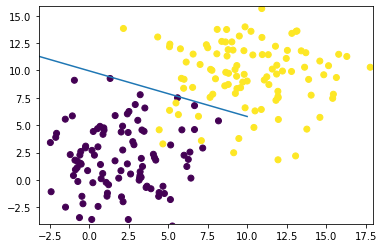

--------------------------------------------------
Iteration No. : 37
Current Accuracy : 93.5
Weights : (11.25894675335741, 13.089630464122132, -147.92411519244797)


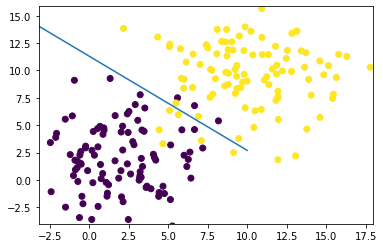

--------------------------------------------------
Iteration No. : 38
Current Accuracy : 92.5
Weights : (12.78332702014923, 12.966928388667613, -148.92411519244797)


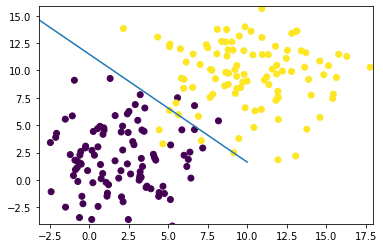

--------------------------------------------------
Iteration No. : 39
Current Accuracy : 92.5
Weights : (13.589394043337855, 10.775397891647156, -149.92411519244797)


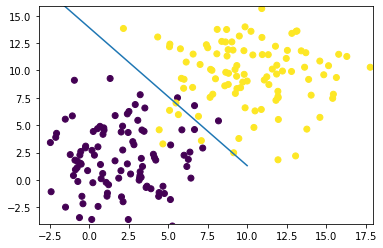

--------------------------------------------------
Iteration No. : 40
Current Accuracy : 91.5
Weights : (14.63970655386995, 10.359417952290976, -150.92411519244797)


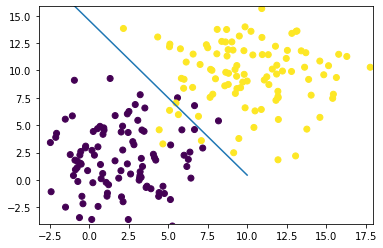

--------------------------------------------------
Iteration No. : 41
Current Accuracy : 92.0
Weights : (5.99479838000462, 17.040967055462325, -152.92411519244797)


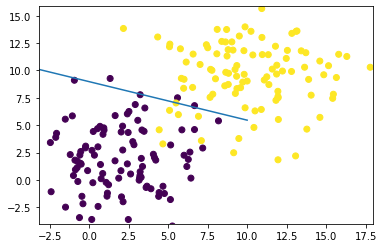

--------------------------------------------------
Iteration No. : 42
Current Accuracy : 92.0
Weights : (11.67621481601412, 11.428515197117013, -154.92411519244797)


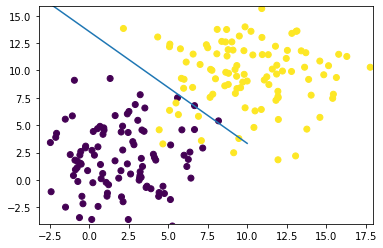

--------------------------------------------------
Iteration No. : 43
Current Accuracy : 92.5
Weights : (12.78536676248926, 12.211472101466486, -155.92411519244797)


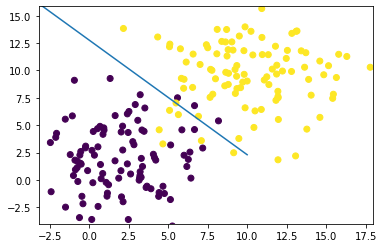

--------------------------------------------------
Iteration No. : 44
Current Accuracy : 92.5
Weights : (14.30974702928108, 12.088770026011966, -156.92411519244797)


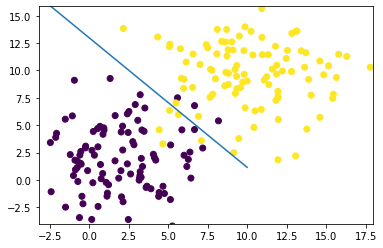

--------------------------------------------------
Iteration No. : 45
Current Accuracy : 92.5
Weights : (15.8341272960729, 11.966067950557447, -157.92411519244797)


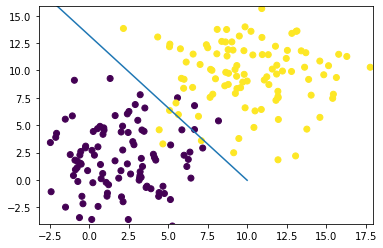

--------------------------------------------------
Iteration No. : 46
Current Accuracy : 93.0
Weights : (6.944973634864097, 16.87206649606452, -159.92411519244797)


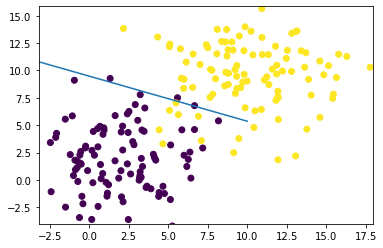

--------------------------------------------------
Iteration No. : 47
Current Accuracy : 92.0
Weights : (7.853544692793753, 16.007415285413032, -161.92411519244797)


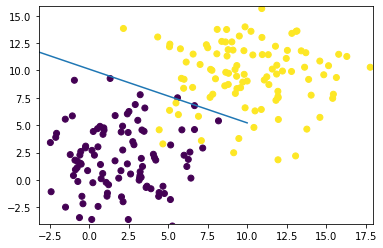

--------------------------------------------------
Iteration No. : 48
Current Accuracy : 92.0
Weights : (8.76211575072341, 15.142764074761542, -163.92411519244797)


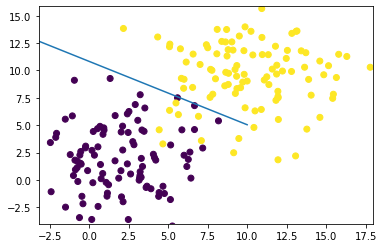

--------------------------------------------------
Iteration No. : 49
Current Accuracy : 93.5
Weights : (14.310906456089267, 11.670541977735214, -164.92411519244797)


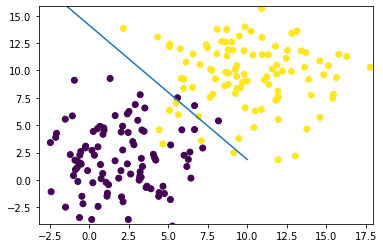

--------------------------------------------------
Iteration No. : 50
Current Accuracy : 93.5
Weights : (15.894126158824129, 12.746776745986347, -165.92411519244797)


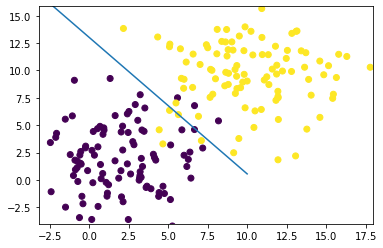

--------------------------------------------------
Iteration No. : 51
Current Accuracy : 93.5
Weights : (17.468221787867908, 9.635194708207111, -166.92411519244797)


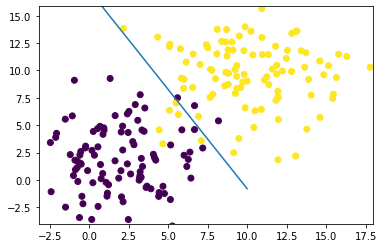

--------------------------------------------------
Iteration No. : 52
Current Accuracy : 93.5
Weights : (12.193805693978558, 15.605206740276886, -167.92411519244797)


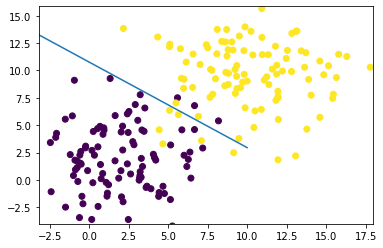

--------------------------------------------------
Iteration No. : 53
Current Accuracy : 92.0
Weights : (7.681426714034877, 15.111562805072401, -169.92411519244797)


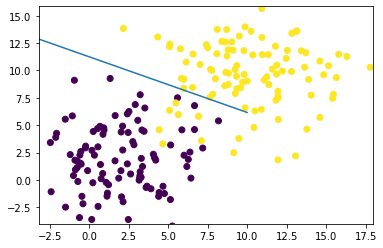

--------------------------------------------------
Iteration No. : 54
Current Accuracy : 94.0
Weights : (16.045212827528335, 11.288636295955405, -169.92411519244797)


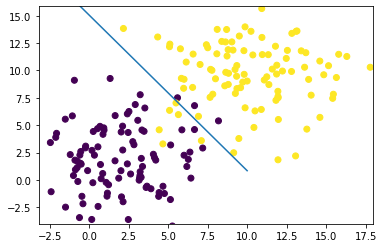

--------------------------------------------------
Iteration No. : 55
Current Accuracy : 93.5
Weights : (12.502384919629055, 13.988691321203758, -170.92411519244797)


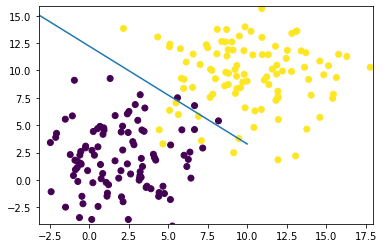

--------------------------------------------------
Iteration No. : 56
Current Accuracy : 93.5
Weights : (14.085604622363917, 15.064926089454888, -171.92411519244797)


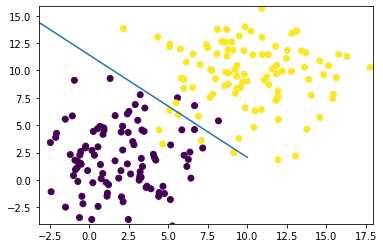

--------------------------------------------------
Iteration No. : 57
Current Accuracy : 93.5
Weights : (15.659700251407696, 11.953344051675648, -172.92411519244797)


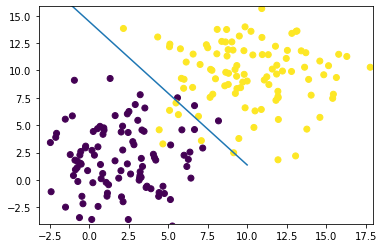

--------------------------------------------------
Iteration No. : 58
Current Accuracy : 93.5
Weights : (12.116872343508415, 14.653399076924002, -173.92411519244797)


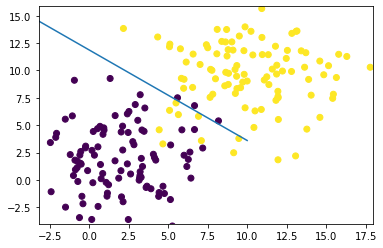

--------------------------------------------------
Iteration No. : 59
Current Accuracy : 93.5
Weights : (13.700092046243277, 15.729633845175131, -174.92411519244797)


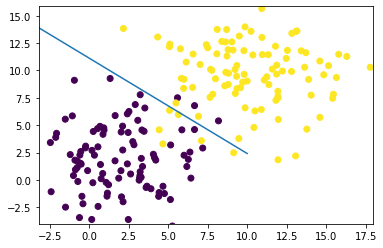

--------------------------------------------------
Iteration No. : 60
Current Accuracy : 92.0
Weights : (9.649083490381866, 17.925845696234475, -176.92411519244797)


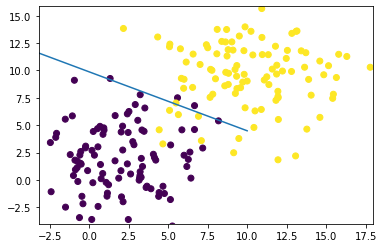

--------------------------------------------------
Iteration No. : 61
Current Accuracy : 93.5
Weights : (15.239896142298829, 11.634446325416844, -177.92411519244797)


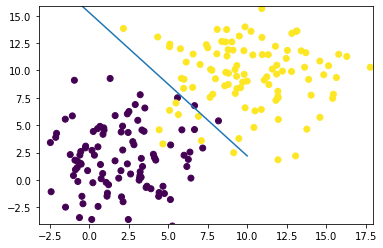

--------------------------------------------------
Iteration No. : 62
Current Accuracy : 93.5
Weights : (17.117076694629123, 11.497351689007536, -178.92411519244797)


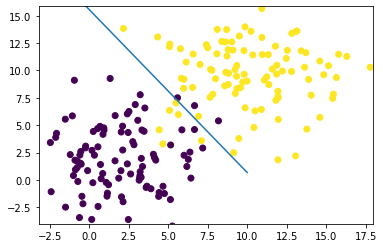

--------------------------------------------------
Iteration No. : 63
Current Accuracy : 93.5
Weights : (13.574248786729843, 14.197406714255889, -179.92411519244797)


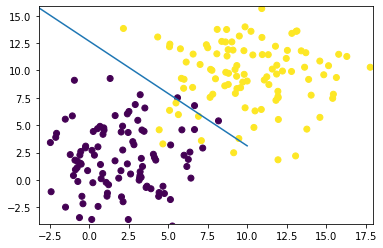

--------------------------------------------------
Iteration No. : 64
Current Accuracy : 93.5
Weights : (15.157468489464705, 15.273641482507019, -180.92411519244797)


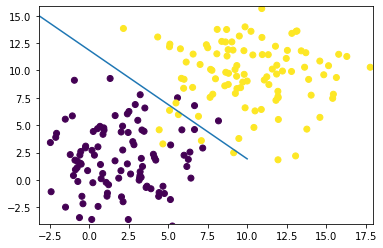

--------------------------------------------------
Iteration No. : 65
Current Accuracy : 93.5
Weights : (16.731564118508484, 12.16205944472778, -181.92411519244797)


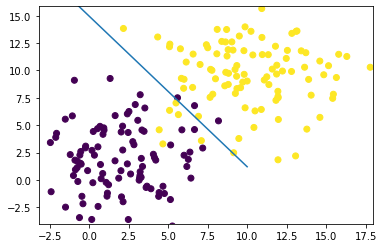

--------------------------------------------------
Iteration No. : 66
Current Accuracy : 93.5
Weights : (13.188736210609203, 14.862114469976133, -182.92411519244797)


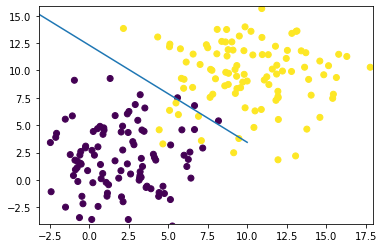

--------------------------------------------------
Iteration No. : 67
Current Accuracy : 93.5
Weights : (14.771955913344065, 15.938349238227262, -183.92411519244797)


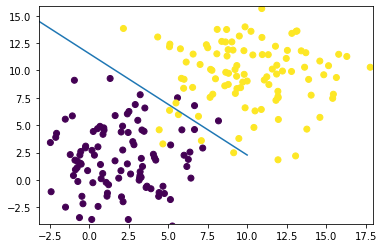

--------------------------------------------------
Iteration No. : 68
Current Accuracy : 94.5
Weights : (14.388731930158823, 17.594568629848, -184.92411519244797)


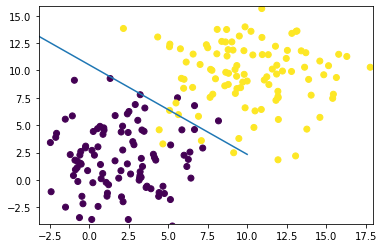

--------------------------------------------------
Iteration No. : 69
Current Accuracy : 93.5
Weights : (15.668866709607169, 15.696315996729199, -185.92411519244797)


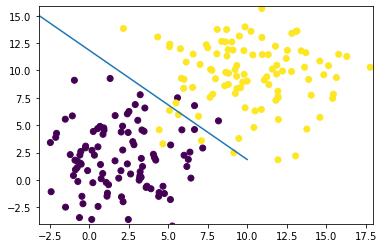

--------------------------------------------------
Iteration No. : 70
Current Accuracy : 93.5
Weights : (17.242962338650944, 12.58473395894996, -186.92411519244797)


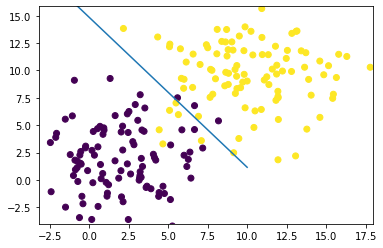

--------------------------------------------------
Iteration No. : 71
Current Accuracy : 93.5
Weights : (13.700134430751664, 15.284788984198313, -187.92411519244797)


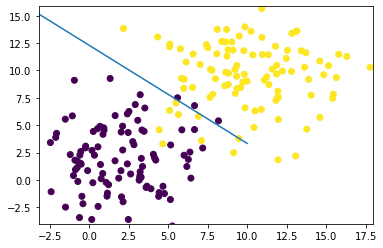

--------------------------------------------------
Iteration No. : 72
Current Accuracy : 93.5
Weights : (15.283354133486526, 16.36102375244944, -188.92411519244797)


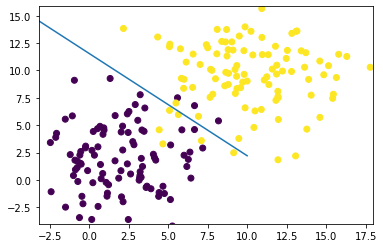

--------------------------------------------------
Iteration No. : 73
Current Accuracy : 94.5
Weights : (14.900130150301283, 18.01724314407018, -189.92411519244797)


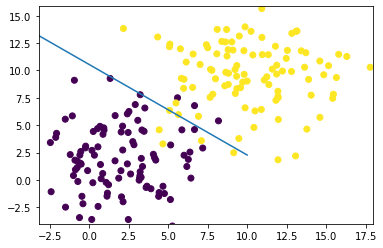

--------------------------------------------------
Iteration No. : 74
Current Accuracy : 93.5
Weights : (16.18026492974963, 16.118990510951377, -190.92411519244797)


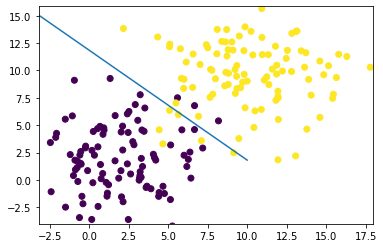

--------------------------------------------------
Iteration No. : 75
Current Accuracy : 93.5
Weights : (17.754360558793405, 13.00740847317214, -191.92411519244797)


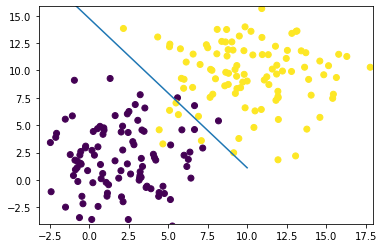

--------------------------------------------------
Iteration No. : 76
Current Accuracy : 93.5
Weights : (14.211532650894124, 15.707463498420493, -192.92411519244797)


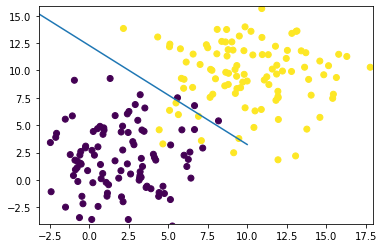

--------------------------------------------------
Iteration No. : 77
Current Accuracy : 93.5
Weights : (15.794752353628986, 16.78369826667162, -193.92411519244797)


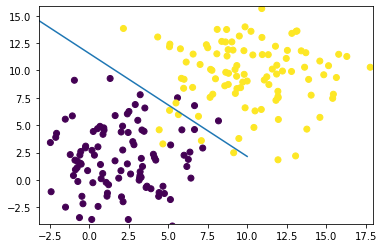

--------------------------------------------------
Iteration No. : 78
Current Accuracy : 93.5
Weights : (15.526721133425191, 12.26294498008179, -194.92411519244797)


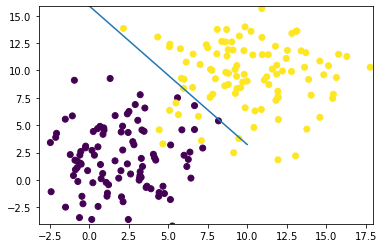

--------------------------------------------------
Iteration No. : 79
Current Accuracy : 95.0
Weights : (14.754022263039722, 19.5815462711833, -194.92411519244797)


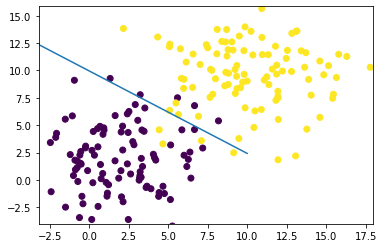

--------------------------------------------------
Iteration No. : 80
Current Accuracy : 93.5
Weights : (17.923246117561018, 11.877382402189879, -195.92411519244797)


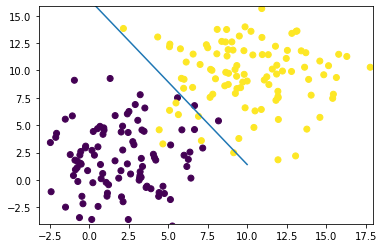

--------------------------------------------------
Iteration No. : 81
Current Accuracy : 93.5
Weights : (13.790806312823864, 15.667864358567053, -196.92411519244797)


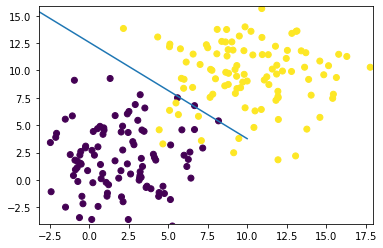

--------------------------------------------------
Iteration No. : 82
Current Accuracy : 94.0
Weights : (19.647720973322667, 17.65559829951513, -196.92411519244797)


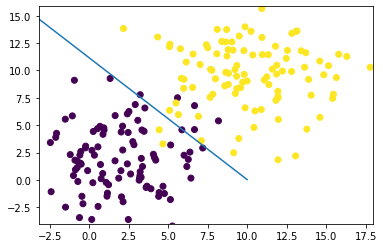

--------------------------------------------------
Iteration No. : 83
Current Accuracy : 93.5
Weights : (16.972614227042502, 17.116373126122113, -197.92411519244797)


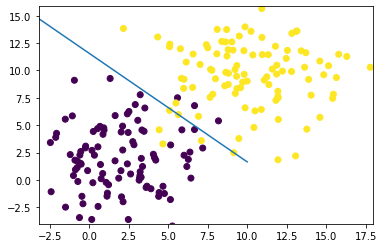

--------------------------------------------------
Iteration No. : 84
Current Accuracy : 93.5
Weights : (18.546709856086277, 14.004791088342875, -198.92411519244797)


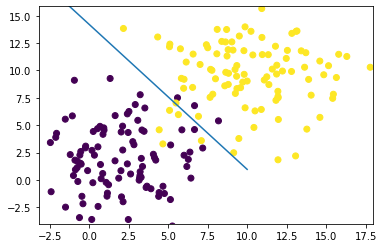

--------------------------------------------------
Iteration No. : 85
Current Accuracy : 93.5
Weights : (13.272293762196927, 19.974803120412645, -199.92411519244797)


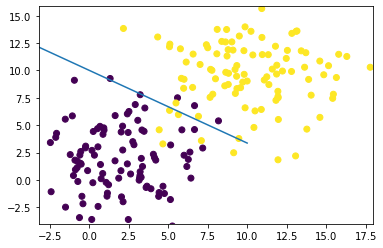

--------------------------------------------------
Iteration No. : 86
Current Accuracy : 92.5
Weights : (16.356187909450792, 12.946132865552093, -200.92411519244797)


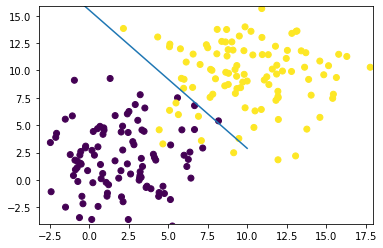

--------------------------------------------------
Iteration No. : 87
Current Accuracy : 95.0
Weights : (18.321524692097423, 13.717018327090363, -200.92411519244797)


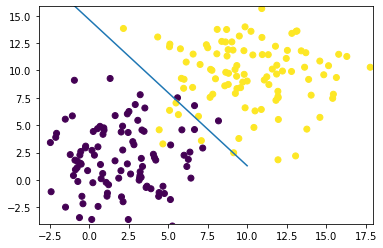

--------------------------------------------------
Iteration No. : 88
Current Accuracy : 93.5
Weights : (14.778696784198143, 16.41707335233872, -201.92411519244797)


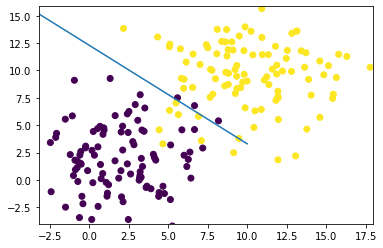

--------------------------------------------------
Iteration No. : 89
Current Accuracy : 93.5
Weights : (16.361916486933, 17.493308120589845, -202.92411519244797)


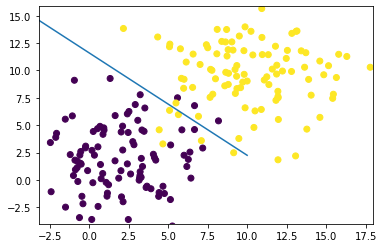

--------------------------------------------------
Iteration No. : 90
Current Accuracy : 92.5
Weights : (15.301548211150926, 16.174368962488245, -203.92411519244797)


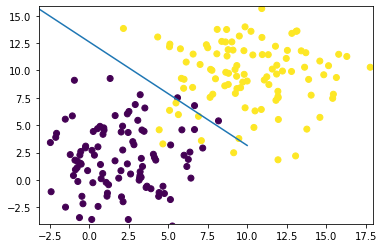

--------------------------------------------------
Iteration No. : 91
Current Accuracy : 93.5
Weights : (14.914879622103665, 15.873870912347884, -204.92411519244797)


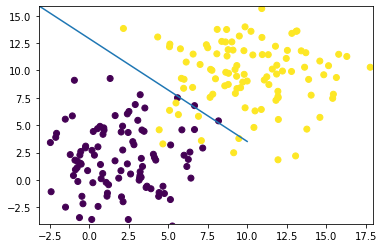

--------------------------------------------------
Iteration No. : 92
Current Accuracy : 94.0
Weights : (20.771794282602468, 17.86160485329596, -204.92411519244797)


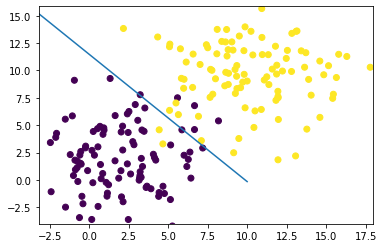

--------------------------------------------------
Iteration No. : 93
Current Accuracy : 93.5
Weights : (18.096687536322303, 17.322379679902944, -205.92411519244797)


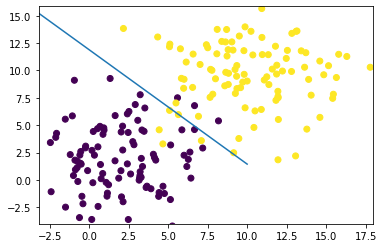

--------------------------------------------------
Iteration No. : 94
Current Accuracy : 93.5
Weights : (19.67078316536608, 14.210797642123707, -206.92411519244797)


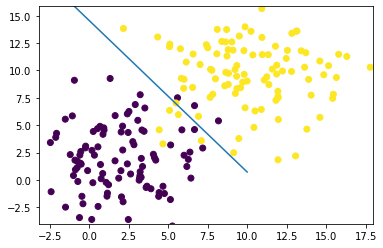

--------------------------------------------------
Iteration No. : 95
Current Accuracy : 93.5
Weights : (14.396367071476728, 20.180809674193476, -207.92411519244797)


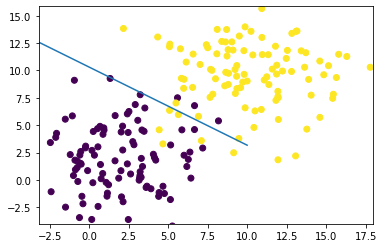

--------------------------------------------------
Iteration No. : 96
Current Accuracy : 92.5
Weights : (17.480261218730593, 13.152139419332924, -208.92411519244797)


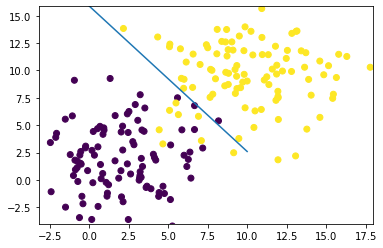

--------------------------------------------------
Iteration No. : 97
Current Accuracy : 95.0
Weights : (19.445598001377224, 13.923024880871194, -208.92411519244797)


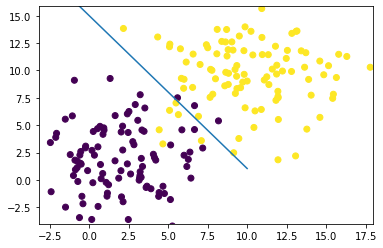

--------------------------------------------------
Iteration No. : 98
Current Accuracy : 93.5
Weights : (15.902770093477944, 16.62307990611955, -209.92411519244797)


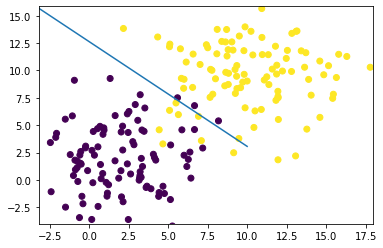

--------------------------------------------------
Iteration No. : 99
Current Accuracy : 92.5
Weights : (14.282470330407332, 17.12747851290969, -210.92411519244797)


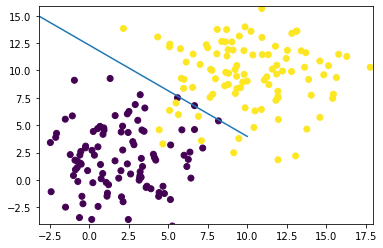

--------------------------------------------------
Iteration No. : 100
Current Accuracy : 94.0
Weights : (20.139384990906134, 19.11521245385777, -210.92411519244797)


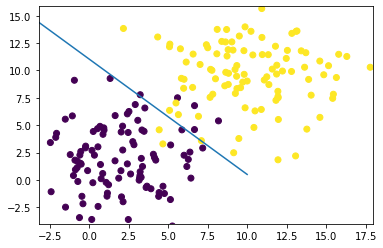

--------------------------------------------------


In [ ]:
 w,w0 = perceptron_training(x,y,w,w0)

# **Gradient & Partials**

In [ ]:
def get_partials(func,x,y):
    delta=0.0001
    fx = (func(x+delta,y)-func(x,y))/delta
    fy = (func(x,y+delta)-func(x,y))/delta
    return fx, fy

In [ ]:
def get_grid(axis_lim):
    x= np.linspace(-axis_lim,axis_lim,5)
    y= np.linspace(-axis_lim,axis_lim,5)
    g1,g2=np.meshgrid(x,y)
    return g1,g2

* numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy')
* Return a list of coordinate matrices from coordinate vectors.
* Make N-D coordinate arrays for vectorized evaluations of N-D scalar/vector fields over N-D grids, given one-dimensional coordinate arrays x1, x2,…, xn

In [ ]:
get_grid(2)

(array([[-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.],
        [-2., -1.,  0.,  1.,  2.]]),
 array([[-2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.]]))

In [ ]:
def get_partials_from_grid(func,g1,g2):
    U=np.zeros(g1.shape) # d(func)/dx
    V=np.zeros(g2.shape) # d(func)/dy
    for row_id,(row_x,row_y) in enumerate(zip(g1,g2)):
        for col_id,(x,y) in enumerate(zip(row_x,row_y)):
            fx,fy=get_partials(func,x,y)
            U[row_id,col_id]=fx
            V[row_id,col_id]=fy
    return U,V

In [ ]:
def plot_gradient(g1,g2,U,V):
    fig,ax=plt.subplots()
    q=ax.quiver(g1,g2,U,V)
    plt.show()

* Axes.quiver(*args, data=None, **kwargs)
* Plot a 2D field of arrows --> Can be Extened to 3D also
* quiver([X, Y], U, V, [C], **kwargs) --> X, Y define the arrow locations, U, V define the arrow directions, and C optionally sets the color.

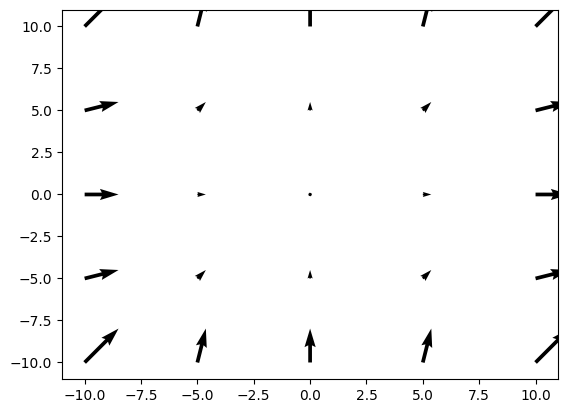

In [ ]:
func = lambda x,y:x**3+y**3
axis_lim=10
g1,g2=get_grid(axis_lim)
U,V=get_partials_from_grid(func,g1,g2)
plot_gradient(g1,g2,U,V)

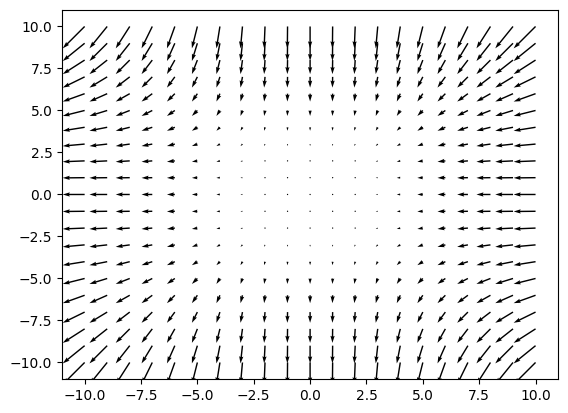

In [ ]:
func = lambda x,y:x**3+y**3
axis_lim=10
g1,g2=get_grid(axis_lim)
U,V=get_partials_from_grid(func,g1,g2)
plot_gradient(g1,g2,-U,-V)

# **Gradient Descent**

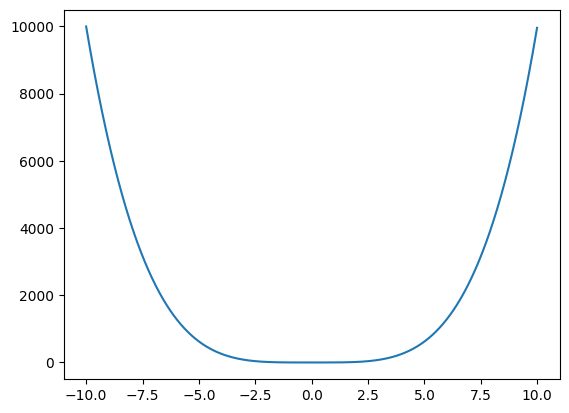

In [ ]:
def f(x):
  ## Try changing this
  return x**4

## Plot f(x)
x = np.arange(-10, 10, 0.01)
y = f(x)

plt.figure()
plt.plot(x, y)
plt.show()

In [ ]:
# This function takes derivative of f at point x
def derivative(x, f):
  delta = 0.0001
  return (f(x + delta) - f(x)) / delta

# This function does exactly one update to my parameter x
def one_step_gd(x, f, lr): # lr -> learning rate, same as \eta
  grad = derivative(x, f)
  new_x = x - lr * grad
  new_fx = f(new_x)
  return new_x, new_fx, grad

In [ ]:
## Define the initial random guess
x0 = 10
num_steps = 0 # Same as t in the update equation

# Let us save all our steps.
xs = []
fxs = []
grads = []

3.03396593259464


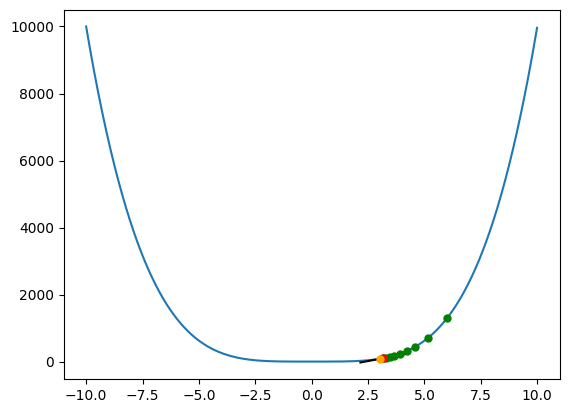

In [ ]:
## Run this box multiple times to see gradient descent in action
# Lets plot!!
plt.figure()

# First, plot the function
x = np.arange(-10, 10, 0.01)
y = f(x)
plt.plot(x, y)

# Now apply gradient descent
new_x, new_fx, grad = one_step_gd(x0, f, 0.001)
xs.append(new_x)
fxs.append(new_fx)
grads.append(grad)
num_steps += 1

# Next, plot the old guess and the gradient at that point
t_c = f(x0) - grads[-1] * x0
delta = 1
t_x = np.arange(x0 - delta, x0 + delta, 0.01)
t_y = grads[-1] * t_x + t_c
plt.plot(t_x, t_y, color="black")

# Next, plot the other guesses
for i in range(num_steps-1):
  plt.plot(xs[i], fxs[i], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")

plt.plot(x0, f(x0), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(xs[-1], fxs[-1], marker="o", markersize=5, markeredgecolor="orange", markerfacecolor="orange")

print(new_x)
x0 = new_x
plt.show()

In [ ]:
xs

[5.999939999601338,
 5.135944319708869,
 4.5940262958833955,
 4.206184506635964,
 3.9085108262594304,
 3.6696688718348014,
 3.471990854162925,
 3.304568104009036,
 3.1602157652052654,
 3.03396593259464]

In [ ]:
fxs

[1295.9481604331613,
 695.7948774592505,
 445.42430080880985,
 313.0064430672804,
 233.3701347755546,
 181.34580426644442,
 145.31628612556204,
 119.2501205611203,
 99.73944359860802,
 84.73109125003944]

In [ ]:
grads

[4000.060000398662,
 863.9956798924686,
 541.9180238254739,
 387.84178924743173,
 297.6736803765334,
 238.84195442462897,
 197.6780176718762,
 167.4227501538894,
 144.3523388037704,
 126.24983261062539]

# **Principle Component Analysis - 2D**

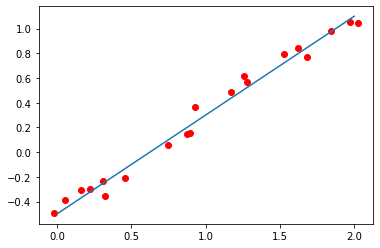

In [ ]:
## Create and visualize the data - 2D, roughly linear

# Set the slope parameter and y-intercept for the line
m =  0.8
c = -0.5

# Create a line
x = np.linspace(0., 2., 100)
y = m * x + c

# sample some points and add noise
num_samples = 20
samples = np.random.permutation(100)[:num_samples]

# noise_factor here controls the spread
noise_factor = 0.05
ex = np.random.randn(num_samples) * noise_factor
ey = np.random.randn(num_samples) * noise_factor

# Create the actual dataset
x_data = x[samples] + ex
y_data = y[samples] + ey

# Create the data matrix with the datapoints as rows
X = np.zeros((num_samples, 2))
X[:, 0] = x_data
X[:, 1] = y_data

plt.figure()
plt.plot(x, y)
plt.scatter(x_data, y_data, color='red')
plt.show()

[39.8407923  0.1592077]


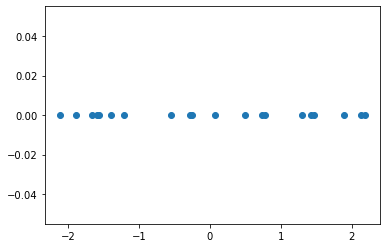

In [ ]:
## Implement PCA!!
# Step 1: Column standardization
mean_x = np.mean(x_data)
mean_y = np.mean(y_data)

std_x = np.std(x_data)
std_y = np.std(y_data)

x_data_cs = (x_data - mean_x) / std_x
y_data_cs = (y_data - mean_y) / std_y

X_st = np.zeros((num_samples, 2))
X_st[:, 0] = x_data_cs
X_st[:, 1] = y_data_cs

# Step 2: Eigenvalue decomposition
cov_X_st = np.matmul(X_st.T, X_st)
eigenvalues, eigenvectors = np.linalg.eig(cov_X_st)

print(eigenvalues)

# Step 3: Reduce the dimension! Choose the eigenvector corresponding to the largest eigenvalue
max_idx = np.argmax(eigenvalues)
X_prime = eigenvectors[:, max_idx].dot(X_st.T)
X_prime_reduced = X_prime

# Step 4: Visualize
plt.figure()
plt.scatter(X_prime_reduced, np.zeros((num_samples,)))
plt.show()

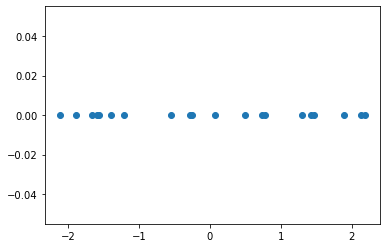

In [ ]:
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=2)

X_p = pca.fit_transform(X_st)

plt.figure()
plt.scatter(X_p[:, 0], np.zeros((num_samples,)))
plt.show()

# **Principle Component Analysis - nD & Dimension Reduction**

## Step 1: Import Libraries & Create random data

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


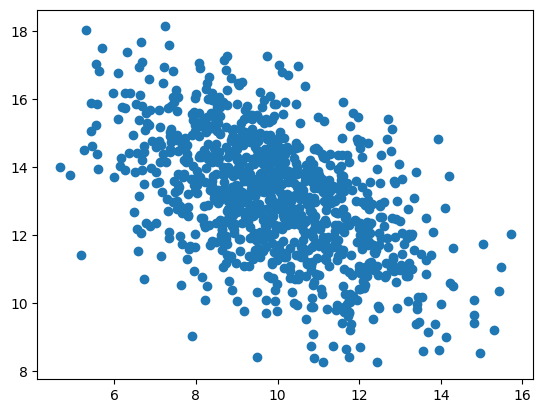

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

# Create random 2d data
mu = np.array([10,13])
sigma = np.array([[3.5, -1.8], [-1.8,3.5]])

print("Mu ", mu.shape)
print("Sigma ", sigma.shape)

# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
print("Data shape ", org_data.shape)
plt.scatter(org_data[:,0],org_data[:,1])


## Step 2: Mean Centering/ Normalize data

Mean  (2,)
Data after subtracting mean  (1000, 2) 



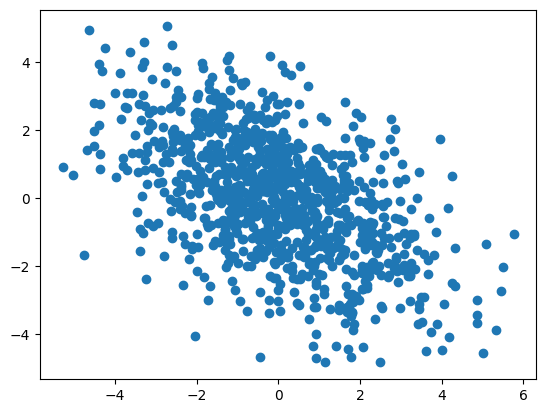

In [ ]:
# Subtract mean from data
mean = np.mean(org_data, axis= 0)
print("Mean ", mean.shape)
mean_data = org_data - mean
print("Data after subtracting mean ", org_data.shape, "\n")
plt.scatter(mean_data[:,0],mean_data[:,1])

## Step 3: Compute the covariance matrix

In [ ]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")
print(cov)

Covariance matrix  (2, 2) 

[[ 3.51 -1.72]
 [-1.72  3.17]]


## Step 4: Compute eigen vectors of the covariance matrix

In [ ]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)
print("Eigen vectors: ", eig_vec)
print("Eigen values: ", eig_val, "\n")
## Notice all eigen vectors are orthogonal to each other

Eigen vectors:  [[ 0.74106611  0.67143207]
 [-0.67143207  0.74106611]]
Eigen values:  [5.06838075 1.61161925] 



In [ ]:
# Sort eigen values and corresponding eigen vectors in descending order
eig_val1 = eig_val[np.argsort(eig_val)][::-1]
eig_vec1 = eig_vec[:,np.argsort(eig_val)][::-1]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[-0.67143207  0.74106611]
 [ 0.74106611  0.67143207]]
Sorted Eigen values  [5.06838075 1.61161925] 



In [ ]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]
print("Sorted Eigen vectors ", eig_vec)
print("Sorted Eigen values ", eig_val, "\n")

Sorted Eigen vectors  [[ 0.74106611  0.67143207]
 [-0.67143207  0.74106611]]
Sorted Eigen values  [5.06838075 1.61161925] 



## Compute the explained variance and select N components

We can select top k eigen vectors based on how much compression do we want.

The optimal way of selecting the number of components is to compute the explained variance of each feature. We compute explained variance by dividing the eigen values by the sum of all eigen values. Then, we take the cumulative sum of all eigen values

So, when we have higher dimensional data, we usually take k components in such a way that we get an explained variance of 0.95 or more.

In this article, we will select both components to explain the working of PCA

In [ ]:
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.75873963 0.24126037]
[0.75873963 1.        ]


## Step 6: Transform Data using eigen vectors

Transformed data  (1000, 2)


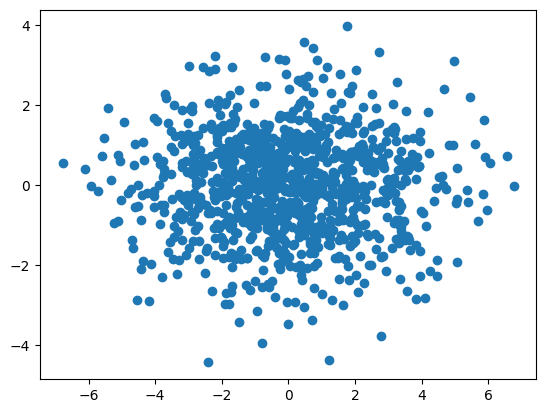

In [ ]:
# Take transpose of eigen vectors with data
pca_data = np.dot(mean_data, eig_vec)
print("Transformed data ", pca_data.shape)
plt.scatter(pca_data[:,0],pca_data[:,1])

## Reference link:

https://towardsdatascience.com/a-step-by-step-implementation-of-principal-component-analysis-5520cc6cd598

# **Just Code for PCA : d-Dimension --> k-Dimensions**

In [ ]:
import numpy as np

def PCA(X , k):
    # X --> d Dimension Data Set with any no of datapoints(assume "n") --> so X is nxd Matrix
    # n - no of data points
    # d - No of Features
    # k - Final desired No of Dimensions
    #Step-1
    X_meaned = (X-np.mean(X , axis = 0)) # nxd Matrix

    #Step-2
    cov_mat = np.cov(X_meaned.T) # dxd Matrix

    #Step-3
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat) # (d,) & (dxd)

    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,k] # dxk Matrix

    #Step-6
    X_reduced = np.dot(X_meaned,eigenvector_subset) # nxk Matrix
    return X_reduced.round(2)

# **Linear Regression (OLS)**

## Python Scratch Implementation


In [ ]:
import numpy as np
class LinearRegression() :
      def __init__(self, learning_rate=0.01, iterations=5):
        self.learning_rate = learning_rate
        self.iterations = iterations

In [ ]:
def predict(self, X):
      return np.dot(X, self.W)+self.b

LinearRegression.predict=predict

In [ ]:
def r2_score(self, X, y):
    y_ = self.predict(X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

LinearRegression.score=r2_score

In [ ]:
def update_weights(self):
    Y_pred = self.predict( self.X )
    # calculate gradients
    dW = - (2*(self.X.T ).dot(self.Y - Y_pred))/self.m
    db = - 2*np.sum(self.Y - Y_pred)/self.m
    # print(self.X.shape, (self.Y-Y_pred).shape, dW.shape)
    # update weights
    self.W = self.W - self.learning_rate * dW
    self.b = self.b - self.learning_rate * db
    return self

LinearRegression.update_weights=update_weights

In [ ]:
def fit(self, X, Y):
    # no_of_training_examples, no_of_features
    self.m, self.d = X.shape
    # weight initialization
    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y
    self.error_list=[]
    # gradient descent learning
    for i in range(self.iterations):
        self.update_weights()
        Y_pred=X.dot(self.W)+self.b
        error=np.square(np.subtract(Y,Y_pred)).mean()
        self.error_list.append(error)
    return self

LinearRegression.fit=fit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/05_Regression_4/cars24-car-price-clean.csv
100%|██████████████████████████████████████| 7.10M/7.10M [00:00<00:00, 10.8MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

In [ ]:
# define X and y
X = df.drop('selling_price', axis=1)
y = df["selling_price"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
lr = LinearRegression(iterations=100)
lr.fit(X_train, y_train)

In [ ]:
lr.predict(X_test)

array([-0.84308986, -0.27745439,  2.44849382, ...,  0.65540967,
       -0.54931517,  0.10246191])

In [ ]:
lr.score(X_train, y_train)

0.9101033692790105

In [ ]:
lr.score(X_test, y_test)

0.9075347558295035

In [ ]:
lr.W

year                0.125722
km_driven          -0.047847
mileage            -0.050197
engine              0.093654
max_power           0.154132
age                -0.125722
make                0.189528
model               0.371064
Individual         -0.025478
Trustmark Dealer   -0.004997
Diesel              0.045118
Electric            0.016967
LPG                 0.002790
Petrol             -0.042832
Manual             -0.105770
5                  -0.005216
>5                  0.003182
dtype: float64

In [ ]:
lr.b

0.0011317414350942227

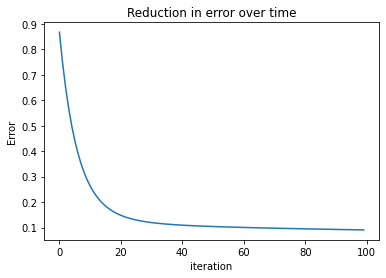

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.plot(lr.error_list)
plt.title("Reduction in error over time")
plt.xlabel("iteration")
plt.ylabel("Error")
plt.show()

In [ ]:
y_hat = lr.predict(X_test)
Adj_R = 1 - (1-lr.score(X_test, y_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Adjusted R-squared:", Adj_R )

Adjusted R-squared: 0.9114445609103706


## Using Scikit learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /Users/nikhilsanghi/Downloads/01_dsml-course-main-live/batches/03_Apr23_Inter_Aug23_Adv_Feb23_Begi_w:o_Python_Mar23_Inter_Oct22_Beg_Tue_Sept22 Begi_Tue/Intro_to_ML/05_Regression_4/cars24-car-price-cleaned.csv
100%|██████████████████████████████████████| 1.69M/1.69M [00:00<00:00, 3.56MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

selling_price    year  km_driven  mileage  engine  max_power   age  \
0           1.20  2012.0     120000    19.70   796.0      46.30  11.0   
1           5.50  2016.0      20000    18.90  1197.0      82.00   7.0   
2           2.15  2010.0      60000    17.00  1197.0      80.00  13.0   
3           2.26  2012.0      37000    20.92   998.0      67.10  11.0   
4           5.70  2015.0      30000    22.77  1498.0      98.59   8.0   

      make                                      model  Individual  \
0   MARUTI                                   ALTO STD           1   
1  HYUNDAI                             GRAND I10 ASTA           1   
2  HYUNDAI                                   I20 ASTA           1   
3   MARUTI                     ALTO K10 2010-2014 VXI           1   
4     FORD  ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV           0   

   Trustmark Dealer  Diesel  Electric  LPG  Petrol  Manual  5  >5  
0                 0       0         0    0       1       1  1   0  
1                 0       0         0    0       1       1  1   0  
2                 0       0         0    0       1       1  1   0  
3                 0       0         0    0       1       1  1   0  
4                 0       1         0    0       0       1  1   0

In [ ]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
df.head()

selling_price    year  km_driven  mileage  engine  max_power   age  \
0           1.20  2012.0     120000    19.70   796.0      46.30  11.0   
1           5.50  2016.0      20000    18.90  1197.0      82.00   7.0   
2           2.15  2010.0      60000    17.00  1197.0      80.00  13.0   
3           2.26  2012.0      37000    20.92   998.0      67.10  11.0   
4           5.70  2015.0      30000    22.77  1498.0      98.59   8.0   

       make     model  Individual  Trustmark Dealer  Diesel  Electric  LPG  \
0  4.684721  1.180000           1                 0       0         0    0   
1  5.458819  4.818750           1                 0       0         0    0   
2  5.458819  3.394000           1                 0       0         0    0   
3  4.684721  2.242676           1                 0       0         0    0   
4  5.858258  6.777576           0                 0       1         0    0   

   Petrol  Manual  5  >5  
0       1       1  1   0  
1       1       1  1   0  
2       1       1  1   0  
3       1       1  1   0  
4       0       1  1   0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0       0.043684  0.689655   0.031553  0.135345  0.117891   0.066506   
1       0.252397  0.827586   0.005237  0.128448  0.177281   0.123994   
2       0.089795  0.620690   0.015764  0.112069  0.177281   0.120773   
3       0.095134  0.689655   0.009711  0.145862  0.147808   0.100000   
4       0.262104  0.793103   0.007869  0.161810  0.221860   0.150709   

        age      make     model  Individual  Trustmark Dealer  Diesel  \
0  0.310345  0.194048  0.041550         1.0               0.0     0.0   
1  0.172414  0.232517  0.218382         1.0               0.0     0.0   
2  0.379310  0.232517  0.149143         1.0               0.0     0.0   
3  0.310345  0.194048  0.093193         1.0               0.0     0.0   
4  0.206897  0.252367  0.313574         0.0               0.0     1.0   

   Electric  LPG  Petrol  Manual    5   >5  
0       0.0  0.0     1.0     1.0  1.0  0.0  
1       0.0  0.0     1.0     1.0  1.0  0.0  
2       0.0  0.0     1.0     1.0  1.0  0.0  
3       0.0  0.0     1.0     1.0  1.0  0.0  
4       0.0  0.0     0.0     1.0  1.0  0.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [ ]:
X_test.shape, y_test.shape

((5946, 17), (5946,))

Univariate

In [ ]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.9967642])

In [ ]:
model.intercept_

0.0015237505846125154

In [ ]:
y_hat = model.predict(X1)

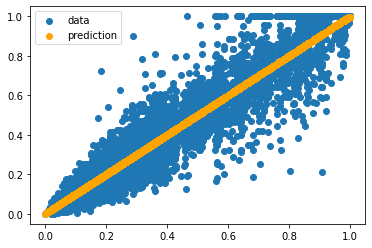

In [ ]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

Multivariate

In [ ]:
print(X.shape, y.shape)

(19820, 17) (19820,)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 7.24834810e+11, -2.55249023e-01, -2.31834412e-01,  7.44266510e-02,
        4.69055176e-02,  7.24834810e+11,  6.60839081e-02,  8.58764648e-01,
       -7.11822510e-03, -7.02285767e-03,  6.84356689e-03,  1.32909596e-01,
        1.49879456e-02, -6.79779053e-03, -3.44848633e-03, -1.61848068e-02,
       -2.35977173e-02])

In [ ]:
model.intercept_

-724834810251.1912

No handles with labels found to put in legend.


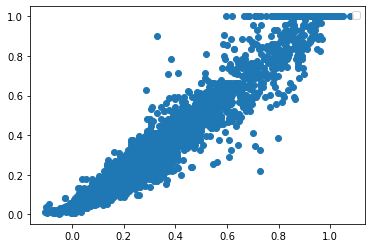

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)

plt.legend()
plt.show()

In [ ]:
model.score(X_train, y_train)

0.9459006122528419

In [ ]:
model.score(X_test, y_test)

0.9459859520373978

In [ ]:
model.coef_

array([ 7.24834810e+11, -2.55249023e-01, -2.31834412e-01,  7.44266510e-02,
        4.69055176e-02,  7.24834810e+11,  6.60839081e-02,  8.58764648e-01,
       -7.11822510e-03, -7.02285767e-03,  6.84356689e-03,  1.32909596e-01,
        1.49879456e-02, -6.79779053e-03, -3.44848633e-03, -1.61848068e-02,
       -2.35977173e-02])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'year'),
  Text(1, 0, 'km_driven'),
  Text(2, 0, 'mileage'),
  Text(3, 0, 'engine'),
  Text(4, 0, 'max_power'),
  Text(5, 0, 'age'),
  Text(6, 0, 'make'),
  Text(7, 0, 'model'),
  Text(8, 0, 'Individual'),
  Text(9, 0, 'Trustmark Dealer'),
  Text(10, 0, 'Diesel'),
  Text(11, 0, 'Electric'),
  Text(12, 0, 'LPG'),
  Text(13, 0, 'Petrol'),
  Text(14, 0, 'Manual'),
  Text(15, 0, '5'),
  Text(16, 0, '>5')])

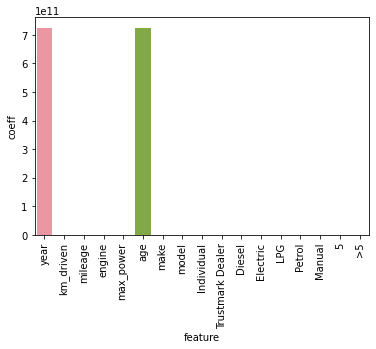

In [ ]:
import seaborn as sns

imp = pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),
                   columns=['feature', 'coeff'])
sns.barplot(x='feature', y='coeff', data=imp)
plt.xticks(rotation=90)

In [ ]:
X_test.columns[np.argmax(np.abs(model.coef_))] # Most Important

'year'

In [ ]:
X_test.columns[np.argmin(np.abs(model.coef_))] # Least Important

'Manual'

## Using Statsmodel

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 24.1MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

In [ ]:
y=df[['selling_price']]
X=df.drop('selling_price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
y_train = np.array(y_train)

In [ ]:
X_train

year  km_driven   mileage    engine  max_power       age      make  \
3443  -0.488480   0.170967 -0.908259  0.041071   0.406096  0.488480 -0.177218   
16090  0.762867  -0.447817  0.234219 -0.921213  -0.694426 -0.762867 -0.433854   
11070  0.450030   1.389198  0.483191 -0.439107  -0.210518 -0.450030 -0.639625   
19214  1.075704  -0.287977 -0.312588 -0.539385  -0.252966 -1.075704 -0.246579   
17843 -1.114153  -0.196436 -0.768649  0.033357   0.265347  1.114153 -0.327501   
...         ...        ...       ...       ...        ...       ...       ...   
1099   1.388540  -0.559005 -1.355012  1.768939   1.109840 -1.388540  0.724475   
18898  1.075704  -0.764944  0.580918 -0.537456  -0.364671 -1.075704 -0.433854   
11798  0.450030  -0.302209 -0.980391  0.222343   0.517801 -0.450030 -0.327501   
6637  -0.488480  -0.834557 -0.145056  1.001426   1.918587  0.488480  3.360773   
2575  -0.175643  -0.563839 -1.047869  0.235842   0.153642  0.175643 -0.240799   

          model  Individual  Trustmark Dealer    Diesel  Electric       LPG  \
3443  -0.432940   -0.800710         -0.098382 -0.985275 -0.020095 -0.056917   
16090 -0.548397    1.248892         -0.098382 -0.985275 -0.020095 -0.056917   
11070 -0.453932    1.248892         -0.098382  1.014945 -0.020095 -0.056917   
19214 -0.275499   -0.800710         -0.098382 -0.985275 -0.020095 -0.056917   
17843 -0.695343    1.248892         -0.098382  1.014945 -0.020095 -0.056917   
...         ...         ...               ...       ...       ...       ...   
1099   2.432495   -0.800710         -0.098382  1.014945 -0.020095 -0.056917   
18898 -0.432940    1.248892         -0.098382 -0.985275 -0.020095 -0.056917   
11798  0.391004   -0.800710         -0.098382 -0.985275 -0.020095 -0.056917   
6637   2.820851   -0.800710         -0.098382  1.014945 -0.020095 -0.056917   
2575  -0.107561   -0.800710         -0.098382 -0.985275 -0.020095 -0.056917   

         Petrol    Manual         5        >5  
3443   1.024622 -2.016868  0.444503 -0.424728  
16090  1.024622  0.495818  0.444503 -0.424728  
11070 -0.975970 -2.016868  0.444503 -0.424728  
19214  1.024622  0.495818  0.444503 -0.424728  
17843 -0.975970  0.495818  0.444503 -0.424728  
...         ...       ...       ...       ...  
1099  -0.975970  0.495818 -2.249703  2.354446  
18898  1.024622  0.495818  0.444503 -0.424728  
11798  1.024622  0.495818  0.444503 -0.424728  
6637  -0.975970 -2.016868  0.444503 -0.424728  
2575   1.024622  0.495818  0.444503 -0.424728  

[15856 rows x 17 columns]

In [ ]:
X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        09:06:21   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.664e-05      0.002  

In [ ]:
results.predict(X_sm)

3443    -0.354511
16090   -0.476414
11070   -0.359932
19214   -0.121763
17843   -0.656579
           ...   
1099     2.335550
18898   -0.334020
11798    0.398398
6637     2.564373
2575    -0.076645
Length: 15856, dtype: float64

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[df.columns.drop('selling_price')]
y = df["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:43:15   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.002     -0.223      0.8

# **Linear Regression Assumptions**

### Multicollinearity and Variance Inflation Factor[VIF]

#### Undersanding

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
# X_t.values enters all the values with out column & row index
# i refer to feature index which is to be considered as dependent to find its VIF
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Removing the features with very high VIF values

In [ ]:
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
sm_model = sm.OLS(list(y_train), X2_sm).fit()
print(sm_model.summary())

In [ ]:
vif_thr = 5
r2_thr = 0.85
i = 1
feats_removed = ['year']
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', i)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features'])
    i += 1

In [ ]:
print(vif)
print(sm_model.summary())

#### Code for High Multicollinear Features Deletion

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
df = pd.read_csv('cars24-car-price-clean.csv')

#Initial Assessment of the Data
y=df['selling_price']
X=df.drop('selling_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

X_sm = sm.add_constant(X_tr_scaled)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(y_train, X_sm).fit()

print(sm_model.summary())

print()
print("*******************************************************************************************************************************")
print()

# Iterative code for auto removing High VIF features with keeping VIF & R2 Threshold values
vif_thr = 5
r2_thr = 0.80
j = 1
feats_removed = []
cols2 = X_train.columns
while True:
    vif = pd.DataFrame()
    X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2]
    vif['Features'] = cols2
    vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    cols2 = vif["Features"][1:].values
    X2 = pd.DataFrame(X_tr_scaled, columns=X_train.columns)[cols2] #Dropped the feature with high VIF & Again check Perfromance of the reamining data

    X2_sm = sm.add_constant(X2)  #Statmodels default is without intercept, to add intercept we need to add constant
    sm_model = sm.OLS(list(y_train), X2_sm).fit()
    if (vif.iloc[0]['VIF'] < vif_thr) or (sm_model.rsquared_adj < r2_thr):
        print('Reached threshold')
        print('Highest vif:',vif.iloc[0])
        print('Current adj.R2',sm_model.rsquared_adj)
        print('Features removed:', j-1)
        print('List of features removed:', feats_removed)
        break
    feats_removed.append(vif.iloc[0]['Features']) # Addting the high VIF removed feature name to feats_removed
    j += 1
print()
print("*******************************************************************************************************************************")
print()
# Final Assesment of Data after removing all possible high VIF feature with set Threshold values
print(vif)
print(sm_model.summary())


Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 107MB/s]
                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.588e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:01:09   Log-Likelihood:                -7.3180
No. Observations:               15856   AIC:                             48.64
Df Residuals:                   15839   BIC:                             179.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t 

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Reached threshold
Highest vif: Features    max_power
VIF              2.71
Name: 0, dtype: object
Current adj.R2 0.7978180731672628
Features removed: 5
List of features removed: ['year', 'Petrol', '>5', 'engine', 'model']

*******************************************************************************************************************************

            Features   VIF
0          max_power  2.71
1               make  2.33
2            mileage  2.24
4             Manual  1.66
5             Diesel  1.53
6                  5  1.45
3                age  1.31
7          km_driven  1.20
8           Electric  1.17
9         Individual  1.08
10  Trustmark Dealer  1.02
11               LPG  1.01
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:        

### Normality of Residuals

In [ ]:
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Histogram of residuals')

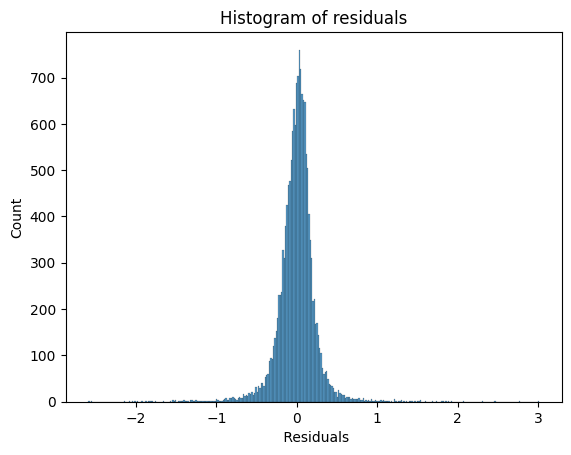

In [ ]:
import seaborn as sns
sns.histplot(errors)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [ ]:
from scipy import stats
res = stats.shapiro(errors)
res.statistic
## Closer the value to 1, more is the normality.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.8526061177253723

### No Heteroskedasticity

In [ ]:
Y_hat = sm_model.predict(X_sm)
errors = Y_hat - y_train

Text(0.5, 1.0, 'Predicted values vs Residuals')

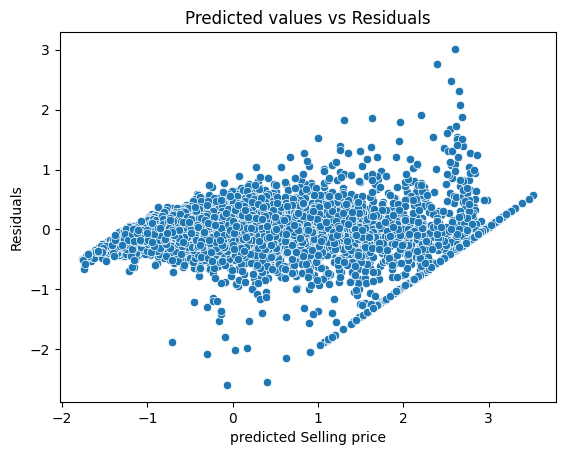

In [ ]:
sns.scatterplot(x=Y_hat,y=errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

# **Polynomial Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)
X = np.random.rand(50,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.7*(X**3) + \
    3.5*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(50,1) # no data in world is perfect

0.9345996128366808


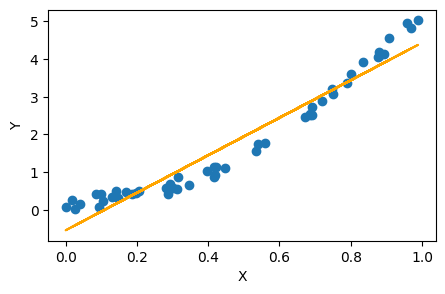

In [ ]:
from sklearn.linear_model import LinearRegression



model = LinearRegression()
model.fit(X, y)

output = model.predict(X)

print(model.score(X,y))

fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.plot(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



In [ ]:
def adj_r(r_sq,X):
  adj_r1 = (1 - ((1-r_sq)*(X.shape[0]-1))/(X.shape[0]-X.shape[1]-1) )
  return adj_r1

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

R-square: 0.9948973526246709
Adj. R-square: 0.9947910474710182


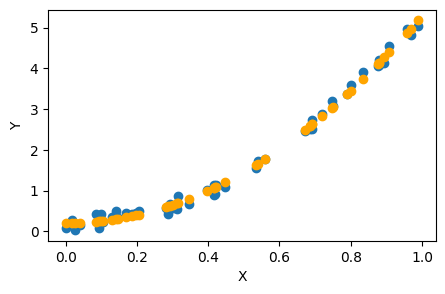

In [ ]:
#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

print("R-square:",model_deg2.score(X_deg2, y))
print('Adj. R-square:', adj_r(r2_score(y,output),X ) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


R-square: 0.994924691754525
Adj. R-square: 0.9948189561660776


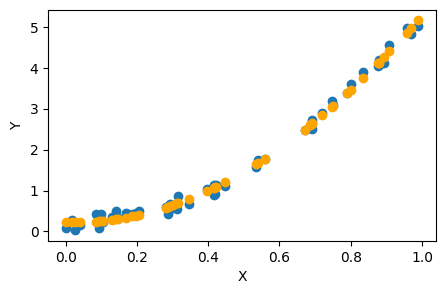

In [ ]:
#adding new feature X^3
X_deg3 = np.hstack([X, X**2,X**3])
model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)

print("R-square:",model_deg3.score(X_deg3, y))
print('Adj. R-square:', adj_r(r2_score(y,output),X) )
fig = plt.figure(figsize=(5,3))
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction",color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

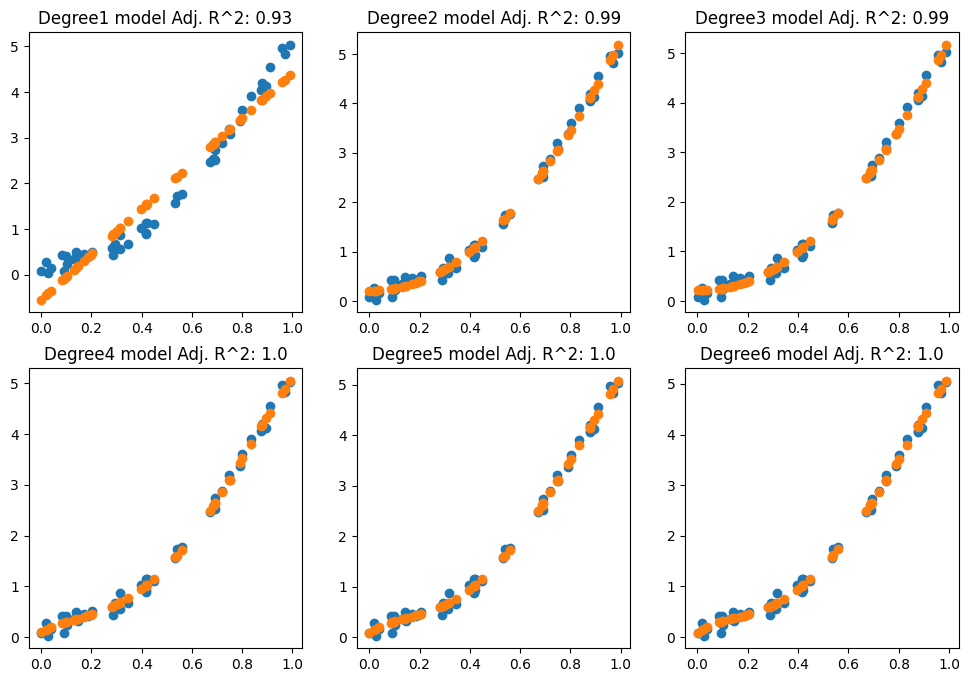

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 6, and seeing performance of the model

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
j = 0
for i in range(1, 7):

    #creates polynomial feature
    poly = PolynomialFeatures(i)

    X_poly = poly.fit_transform(X)
    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting

    axes[j,(i-1)%3].scatter(X, y, label="samples")
    axes[j,(i-1)%3].scatter(X, output, label="prediction")
    axes[j,(i-1)%3].set_title(f'Degree{i} model Adj. R^2: {round(adj_r(r2_score(y,output),X_poly_scaled,y ),2)}')

    if(i==3):
      j=1

# **Ridge**

L2 Regularization

* Hard Code using gradient Descent

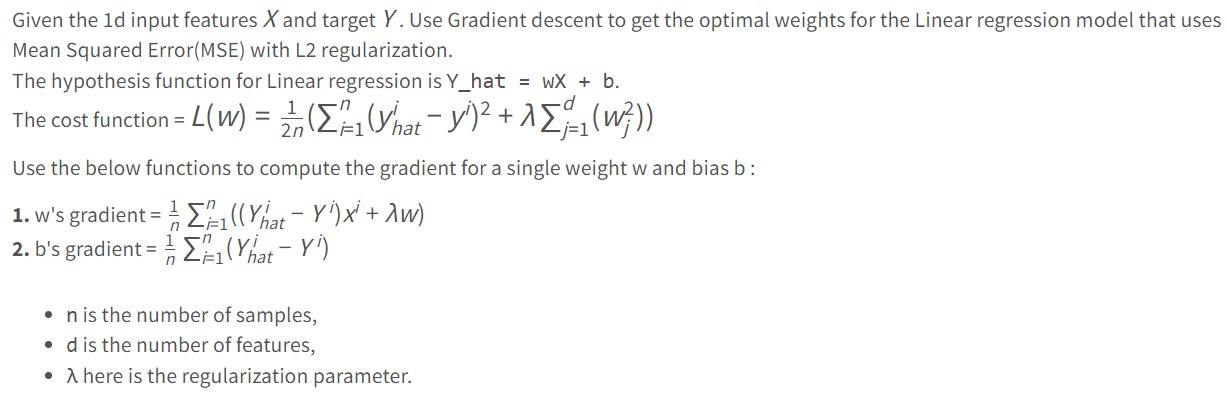

In [ ]:
def L2_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
   X = np.asarray(X)
   Y = np.asarray(Y)

   w_deriv = (np.dot((np.dot(w,X) - Y) ,np.transpose(X)) + lambda_value * w)/ X.shape[0]
   b_deriv = np.sum(np.dot(w,X) - Y)/ X.shape[0]

   w -= learning_rate * w_deriv
   b -= learning_rate * b_deriv

   return(round(w, 2), round(b, 2))

* Code using scikit library

In [ ]:
model = Ridge(alpha = 1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

# **Lasso**

L1 Regularization

In [ ]:
def L1_reg_update_weights(w, b, X, Y, learning_rate, lambda_value=1):
   X = np.asarray(X)
   Y = np.asarray(Y)
   w1 =

   w_deriv = (np.dot((np.dot(w,X) - Y) ,np.transpose(X)) + lambda_value/2 * np.sign(w))/ X.shape[0])
   b_deriv = np.sum(np.dot(w,X) - Y)

   w -= learning_rate * w_deriv
   b -= learning_rate * b_deriv

   return(round(w, 2), round(b, 2))

In [ ]:
model = Lasso(alpha = 1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

In [ ]:
import numpy
numpy.sign([1,-3,-45,-65869,0])

array([ 1, -1, -1, -1,  0])

# **ElasticNet**

L1 & L2 Normalization

* l1_ratio = 0 --> Complete L2 Normalization
* l1_ratio = 1 --> Complete L1 Normalization

* 1 / (2 * n_samples) * ||y - Xw||^2_2 + alpha * l1_ratio * ||w||_1 + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

In [ ]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X,y)
print(model.intercept_)
print(model.coef_)
model.predict(Xtest)